**All code provided by AI** 

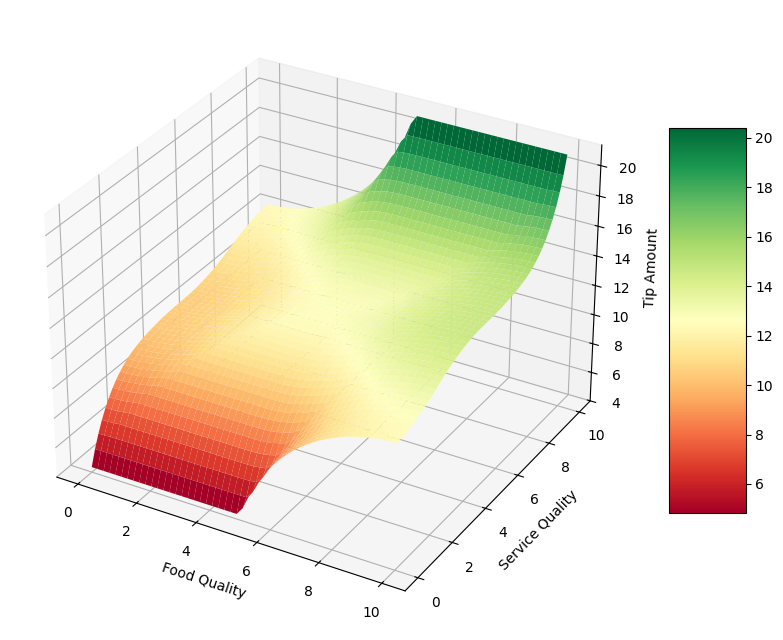

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define fuzzy variables based on typical fuzzy logic system
# Input variables
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
service_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'service_quality')

# Output variable
tip_amount = ctrl.Consequent(np.arange(0, 26, 1), 'tip_amount')

# Define fuzzy membership functions for inputs
food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['good'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

service_quality['poor'] = fuzz.trimf(service_quality.universe, [0, 0, 5])
service_quality['average'] = fuzz.trimf(service_quality.universe, [0, 5, 10])
service_quality['good'] = fuzz.trimf(service_quality.universe, [5, 10, 10])

# Define fuzzy membership functions for output
tip_amount['low'] = fuzz.trimf(tip_amount.universe, [0, 0, 13])
tip_amount['medium'] = fuzz.trimf(tip_amount.universe, [0, 13, 25])
tip_amount['high'] = fuzz.trimf(tip_amount.universe, [13, 25, 25])

# Define fuzzy rules
rule1 = ctrl.Rule(food_quality['poor'] | service_quality['poor'], tip_amount['low'])
rule2 = ctrl.Rule(service_quality['average'], tip_amount['medium'])
rule3 = ctrl.Rule(service_quality['good'] | food_quality['good'], tip_amount['high'])

# Create control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Create a grid for the input variables for 3D plotting
x = np.linspace(0, 10)  # Food Quality
y = np.linspace(0, 10)  # Service Quality
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

# Calculate the fuzzy output for each pair of inputs
for i in range(50):
    for j in range(50):
        tipping.input['food_quality'] = x[i, j]
        tipping.input['service_quality'] = y[i, j]
        tipping.compute()
        z[i, j] = tipping.output['tip_amount']

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='RdYlGn')

# Label the axes
ax.set_xlabel('Food Quality')
ax.set_ylabel('Service Quality')
ax.set_zlabel('Tip Amount')

# Show color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()


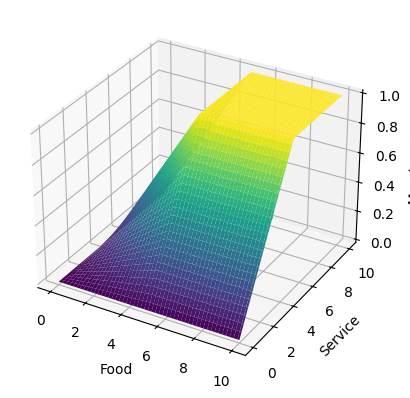

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the universe of discourse for food and service
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define membership functions (example: triangular)
def membership_low(x):
    return np.maximum(0, np.minimum(x/5, 1))

def membership_medium(x):
    return np.maximum(0, np.minimum((x-5)/5, (10-x)/5))

def membership_high(x):
    return np.maximum(0, np.minimum((x-5)/5, 1))

# Calculate membership values for each point in the grid
Z = membership_low(X) * membership_low(Y)  # Example: Low food, low service

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('Food')
ax.set_ylabel('Service')
ax.set_zlabel('Membership')

plt.show()